In [5]:
# Data manipulation and analysis
import pandas as pd
# Encoding categorical labels
from sklearn.preprocessing import LabelEncoder
# Converting text data to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
# More classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Cross-validation with stratified sampling
from sklearn.model_selection import StratifiedKFold
# Deep learning with PyTorch
import torch
# Neural network layers
import torch.nn as nn
# Optimization algorithms for PyTorch
import torch.optim as optim
# Creating custom datasets and data loaders
from torch.utils.data import Dataset, DataLoader
# BERT model and tokenizer for sequence classification
from transformers import BertTokenizer, BertForSequenceClassification
# Data visualization
import matplotlib.pyplot as plt
# Enhanced data visualization
import seaborn as sns
# Stopwords for text processing
from nltk.corpus import stopwords
# Tokenization of text
from nltk.tokenize import word_tokenize
# Regular expressions for string manipulation
import re
# Support Vector Machine for classification
from sklearn.svm import SVC
# Feature standardization
from sklearn.preprocessing import StandardScaler


In [6]:
train_data = pd.read_csv('training.csv')
val_data = pd.read_csv('validation.csv')
test_data = pd.read_csv('testing.csv')


In [7]:
train_data

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [8]:
test_data

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
1995,i just keep feeling like someone is being unki...,3
1996,im feeling a little cranky negative after this...,3
1997,i feel that i am useful to my people and that ...,1
1998,im feeling more comfortable with derby i feel ...,1


In [9]:
val_data

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1
...,...,...
1995,im having ssa examination tomorrow in the morn...,0
1996,i constantly worry about their fight against n...,1
1997,i feel its important to share this info for th...,1
1998,i truly feel that if you are passionate enough...,1


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['label'])
val_labels = label_encoder.transform(val_data['label'])
test_labels = label_encoder.transform(test_data['label'])

# Tokenization and TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_data['text']).toarray()
X_val = vectorizer.transform(val_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(train_labels, dtype=torch.long)
y_val_tensor = torch.tensor(val_labels, dtype=torch.long)

# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(label_encoder.classes_)

model = EmotionDetectionModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model
num_epochs = 50
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_predictions = torch.argmax(val_outputs, dim=1)
    val_accuracy = accuracy_score(val_labels, val_predictions.numpy())
    print("Validation Accuracy:", val_accuracy)

    test_outputs = model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_accuracy = accuracy_score(test_labels, test_predictions.numpy())
    print("Test Accuracy:", test_accuracy)


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

Validation Accuracy: 0.8315
Test Accuracy: 0.841


In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_val

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17595883, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
test_labels

array([0, 0, 0, ..., 1, 1, 4])

In [16]:
val_labels

array([0, 0, 2, ..., 1, 1, 1])

In [17]:
train_labels

array([0, 0, 3, ..., 1, 3, 0])

Validation Accuracy: 0.828
Validation Precision: 0.8296936244538704
Validation Recall: 0.828
Validation F1-Score: 0.828276011379911
Test Accuracy: 0.841
Test Precision: 0.8404044044997613
Test Recall: 0.841
Test F1-Score: 0.840566760002293


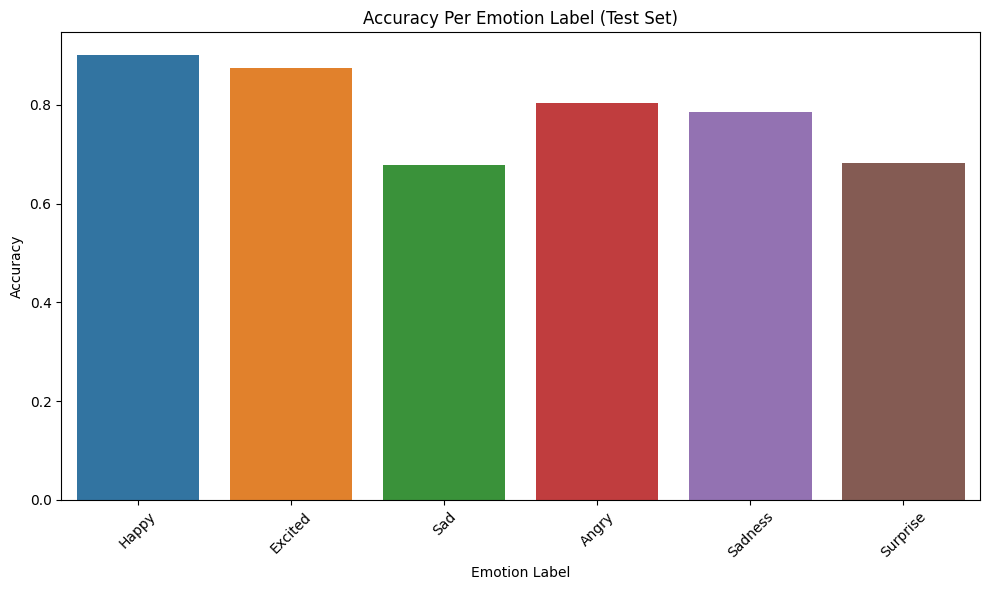

In [18]:
# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# Tokenization and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_data['text']).toarray()
X_val = vectorizer.transform(val_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(train_data['label'], dtype=torch.long)
y_val_tensor = torch.tensor(val_data['label'], dtype=torch.long)
y_test_tensor = torch.tensor(test_data['label'], dtype=torch.long)

# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(set(y_train_tensor.numpy()))

model = EmotionDetectionModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model
num_epochs = 50
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
def evaluate_model(model, X_data, y_data):
    with torch.no_grad():
        model.eval()
        outputs = model(X_data)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_data, predictions.numpy())
        precision = precision_score(y_data, predictions.numpy(), average='weighted')
        recall = recall_score(y_data, predictions.numpy(), average='weighted')
        f1 = f1_score(y_data, predictions.numpy(), average='weighted')
        return accuracy, precision, recall, f1, predictions

val_accuracy, val_precision, val_recall, val_f1, val_predictions = evaluate_model(model, X_val_tensor, y_val_tensor)
test_accuracy, test_precision, test_recall, test_f1, test_predictions = evaluate_model(model, X_test_tensor, y_test_tensor)

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-Score:", val_f1)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Define label-to-emotion mapping
label_to_emotion = {
    0: "Happy",
    1: "Excited",
    2: "Sad",
    3: "Angry",
    4: "Sadness",
    5: "Surprise"
}

# Create a bar chart of correct label output accuracy
def plot_accuracy(y_true, y_pred, title):
    correct = (y_true == y_pred)
    accuracy_per_label = {}
    for label in set(y_true):
        label_indices = y_true == label
        label_accuracy = accuracy_score(y_true[label_indices], y_pred[label_indices])
        accuracy_per_label[label_to_emotion[label]] = label_accuracy

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_per_label.keys()), y=list(accuracy_per_label.values()))
    plt.xlabel('Emotion Label')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_accuracy(y_test_tensor.numpy(), test_predictions.numpy(), title='Accuracy Per Emotion Label (Test Set)')


Validation Accuracy: 0.83
Validation Precision: 0.8310766816450371
Validation Recall: 0.83
Validation F1-Score: 0.8300387308593182
Test Accuracy: 0.839
Test Precision: 0.8381396552774941
Test Recall: 0.839
Test F1-Score: 0.8384583153811365


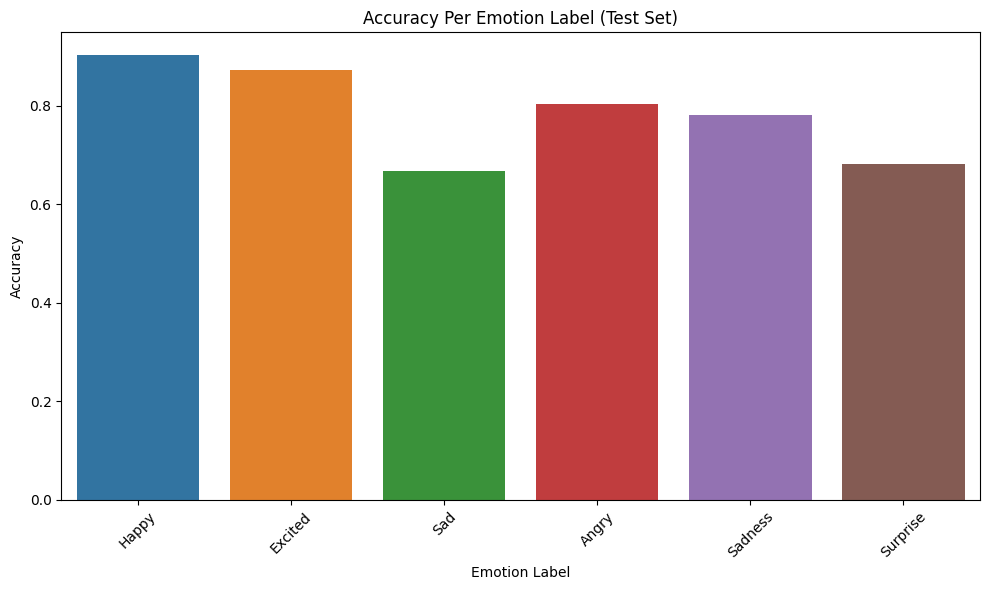

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Tokenization and TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_data['text']).toarray()
X_val = vectorizer.transform(val_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Perform label preprocessing
def preprocess_labels(labels):
    labels = labels.astype(int)  # Ensure labels are integers
    min_valid_label = torch.iinfo(torch.int64).min
    max_valid_label = torch.iinfo(torch.int64).max
    labels = labels.clip(min_valid_label, max_valid_label)  # Clip labels to int64 range
    return labels

y_train_tensor = torch.tensor(preprocess_labels(train_data['label']), dtype=torch.long)
y_val_tensor = torch.tensor(preprocess_labels(val_data['label']), dtype=torch.long)
y_test_tensor = torch.tensor(preprocess_labels(test_data['label']), dtype=torch.long)

# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(set(y_train_tensor.numpy()))

model = EmotionDetectionModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model (remaining code remains the same)
num_epochs = 50
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model (remaining code remains the same)
def evaluate_model(model, X_data, y_data):
    with torch.no_grad():
        model.eval()
        outputs = model(X_data)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_data, predictions.numpy())
        precision = precision_score(y_data, predictions.numpy(), average='weighted')
        recall = recall_score(y_data, predictions.numpy(), average='weighted')
        f1 = f1_score(y_data, predictions.numpy(), average='weighted')
        return accuracy, precision, recall, f1, predictions

val_accuracy, val_precision, val_recall, val_f1, val_predictions = evaluate_model(model, X_val_tensor, y_val_tensor)
test_accuracy, test_precision, test_recall, test_f1, test_predictions = evaluate_model(model, X_test_tensor, y_test_tensor)

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-Score:", val_f1)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Define label-to-emotion mapping (remaining code remains the same)
label_to_emotion = {
    0: "Happy",
    1: "Excited",
    2: "Sad",
    3: "Angry",
    4: "Sadness",
    5: "Surprise"
}

# Create a bar chart of correct label output accuracy (remaining code remains the same)
def plot_accuracy(y_true, y_pred, title):
    correct = (y_true == y_pred)
    accuracy_per_label = {}
    for label in set(y_true):
        label_indices = y_true == label
        label_accuracy = accuracy_score(y_true[label_indices], y_pred[label_indices])
        accuracy_per_label[label_to_emotion[label]] = label_accuracy

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_per_label.keys()), y=list(accuracy_per_label.values()))
    plt.xlabel('Emotion Label')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the accuracy per emotion label (remaining code remains the same)
plot_accuracy(y_test_tensor.numpy(), test_predictions.numpy(), title='Accuracy Per Emotion Label (Test Set)')


Validation Accuracy: 0.8295
Validation Precision: 0.8302770166596392
Validation Recall: 0.8295
Validation F1-Score: 0.8294378765834347
Test Accuracy: 0.843
Test Precision: 0.8425836387258164
Test Recall: 0.843
Test F1-Score: 0.8426498319533242


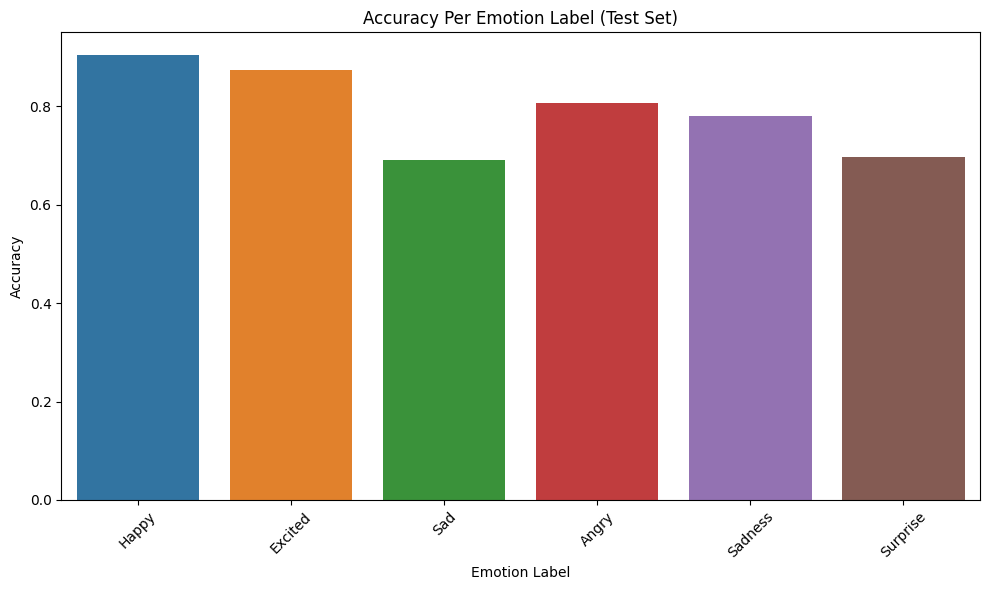

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Tokenization and TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_data['text']).toarray()
X_val = vectorizer.transform(val_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Perform label preprocessing
def preprocess_labels(labels):
    # Convert labels to integers and replace non-finite values with -1
    labels = labels.fillna(-1).astype(int)

    # Clip labels to the valid int64 range
    min_valid_label = torch.iinfo(torch.int64).min
    max_valid_label = torch.iinfo(torch.int64).max
    labels = labels.clip(min_valid_label, max_valid_label)

    return labels

y_train_tensor = torch.tensor(preprocess_labels(train_data['label']), dtype=torch.long)
y_val_tensor = torch.tensor(preprocess_labels(val_data['label']), dtype=torch.long)
y_test_tensor = torch.tensor(preprocess_labels(test_data['label']), dtype=torch.long)

# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(set(y_train_tensor.numpy()))

model = EmotionDetectionModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train the model (remaining code remains the same)
num_epochs = 50
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model (remaining code remains the same)
def evaluate_model(model, X_data, y_data):
    with torch.no_grad():
        model.eval()
        outputs = model(X_data)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_data, predictions.numpy())
        precision = precision_score(y_data, predictions.numpy(), average='weighted')
        recall = recall_score(y_data, predictions.numpy(), average='weighted')
        f1 = f1_score(y_data, predictions.numpy(), average='weighted')
        return accuracy, precision, recall, f1, predictions

val_accuracy, val_precision, val_recall, val_f1, val_predictions = evaluate_model(model, X_val_tensor, y_val_tensor)
test_accuracy, test_precision, test_recall, test_f1, test_predictions = evaluate_model(model, X_test_tensor, y_test_tensor)

print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1-Score:", val_f1)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)
# Define label-to-emotion mapping (remaining code remains the same)
label_to_emotion = {
    0: "Happy",
    1: "Excited",
    2: "Sad",
    3: "Angry",
    4: "Sadness",
    5: "Surprise"
}

# Create a bar chart of correct label output accuracy (remaining code remains the same)
def plot_accuracy(y_true, y_pred, title):
    correct = (y_true == y_pred)
    accuracy_per_label = {}
    for label in set(y_true):
        label_indices = y_true == label
        label_accuracy = accuracy_score(y_true[label_indices], y_pred[label_indices])
        accuracy_per_label[label_to_emotion[label]] = label_accuracy

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_per_label.keys()), y=list(accuracy_per_label.values()))
    plt.xlabel('Emotion Label')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the accuracy per emotion label (remaining code remains the same)
plot_accuracy(y_test_tensor.numpy(), test_predictions.numpy(), title='Accuracy Per Emotion Label (Test Set)')


<ipython-input-21-23e056224be1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = train_data.append(val_data, ignore_index=True)


SVM Classification Report:
               precision    recall  f1-score   support

       Happy       0.89      0.89      0.89      1092
     Excited       0.79      0.93      0.85      1176
         Sad       0.83      0.66      0.74       318
       Angry       0.90      0.74      0.81       462
     Sadness       0.81      0.72      0.76       415
    Surprise       0.88      0.66      0.76       137

    accuracy                           0.84      3600
   macro avg       0.85      0.77      0.80      3600
weighted avg       0.84      0.84      0.83      3600



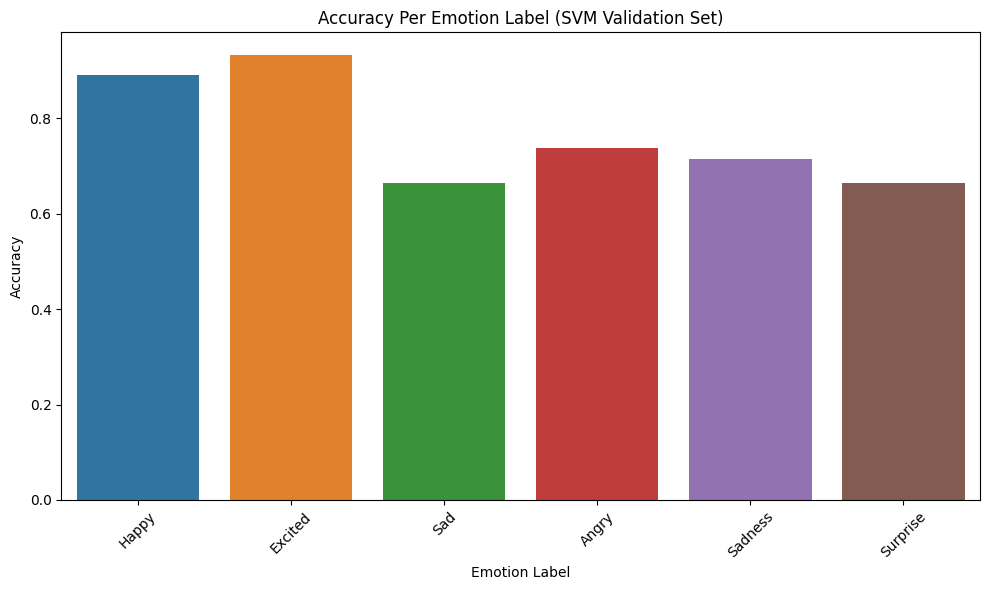

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the SVM model class
class EmotionDetectionSVM:
    def __init__(self, C=1.0, kernel='linear'):
        self.model = SVC(C=C, kernel=kernel)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_data):
        return self.model.predict(X_data)

# Assuming you have 'train_data', 'val_data', and 'test_data'

# Combine train and validation data for preprocessing
combined_data = train_data.append(val_data, ignore_index=True)

# Split data and labels
X = combined_data['text']
y = combined_data['label']

# Split combined_data into train and validation sets
X_train_combined, X_val, y_train_combined, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the vectorizer on the combined training data
X_train_tfidf = vectorizer.fit_transform(X_train_combined).toarray()

# Transform the validation data using the same vectorizer
X_val_tfidf = vectorizer.transform(X_val).toarray()

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_combined)
y_val_encoded = label_encoder.transform(y_val)

# Create and train the SVM model
svm_model = EmotionDetectionSVM()
svm_model.train(X_train_tfidf, y_train_encoded)

# Predict and evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val_tfidf)
svm_val_accuracy = accuracy_score(y_val_encoded, svm_val_predictions)

# Print classification report
svm_classification_rep = classification_report(y_val_encoded, svm_val_predictions, target_names=label_to_emotion.values())
print("SVM Classification Report:\n", svm_classification_rep)

# Plot accuracy per emotion label for the SVM model
def plot_accuracy(y_true, y_pred, title):
    accuracy_per_label = {}
    for label in set(y_true):
        label_indices = y_true == label
        label_accuracy = accuracy_score(y_true[label_indices], y_pred[label_indices])
        accuracy_per_label[label_to_emotion[label]] = label_accuracy

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(accuracy_per_label.keys()), y=list(accuracy_per_label.values()))
    plt.xlabel('Emotion Label')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot accuracy per emotion label for the SVM model
plot_accuracy(y_val_encoded, svm_val_predictions, title='Accuracy Per Emotion Label (SVM Validation Set)')


<ipython-input-22-e0d633bc0f98>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = train_data.append(val_data, ignore_index=True)


Fold Classification Report:
               precision    recall  f1-score   support

       Happy       0.89      0.88      0.89      1044
     Excited       0.81      0.93      0.86      1213
         Sad       0.84      0.67      0.74       297
       Angry       0.87      0.80      0.83       486
     Sadness       0.83      0.72      0.77       430
    Surprise       0.81      0.69      0.75       130

    accuracy                           0.84      3600
   macro avg       0.84      0.78      0.81      3600
weighted avg       0.85      0.84      0.84      3600

Fold Classification Report:
               precision    recall  f1-score   support

       Happy       0.88      0.90      0.89      1043
     Excited       0.79      0.91      0.85      1213
         Sad       0.80      0.69      0.74       297
       Angry       0.89      0.74      0.81       487
     Sadness       0.82      0.75      0.78       430
    Surprise       0.91      0.58      0.71       130

    accuracy       

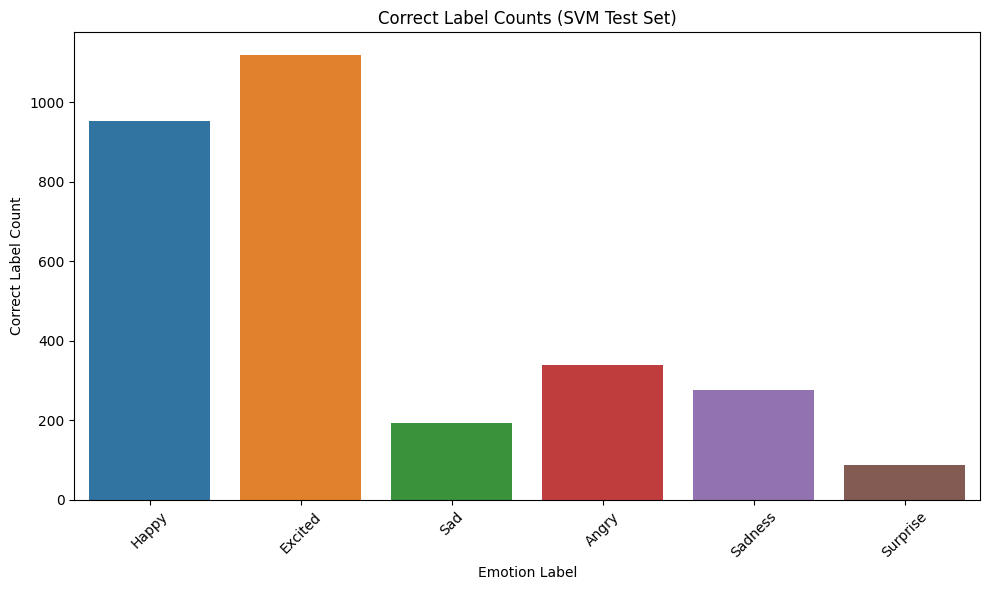

Predicted Emotion: 1


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the deep learning model
class EmotionDetectionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EmotionDetectionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the SVM model class
class EmotionDetectionSVM:
    def __init__(self, C=1.0, kernel='linear'):
        self.model = SVC(C=C, kernel=kernel)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_data):
        return self.model.predict(X_data)

# Combine train and validation data for preprocessing
combined_data = train_data.append(val_data, ignore_index=True)
# Split data and labels
X = combined_data['text']
y = combined_data['label']

# Count the occurrences of each label
label_counts = y.value_counts()

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
svm_val_accuracies = []

for train_index, val_index in skf.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Fit and transform the vectorizer on the training data
    X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

    # Transform the validation data using the same vectorizer
    X_val_tfidf = vectorizer.transform(X_val).toarray()

    # Create and train the SVM model
    svm_model = EmotionDetectionSVM()
    svm_model.train(X_train_tfidf, y_train)

    # Predict and evaluate the SVM model on the validation set
    svm_val_predictions = svm_model.predict(X_val_tfidf)
    svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
    svm_val_accuracies.append(svm_val_accuracy)

    # Print classification report for each fold
    svm_classification_rep = classification_report(y_val, svm_val_predictions, target_names=label_to_emotion.values())
    print("Fold Classification Report:\n", svm_classification_rep)

# Calculate and print the average accuracy over k-fold cross-validation
avg_svm_val_accuracy = sum(svm_val_accuracies) / k_folds
print("Average SVM Validation Accuracy:", avg_svm_val_accuracy)

# Print the count of each label
print("Label Counts:")
print(label_counts)

# Split data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Transform the training data using the vectorizer
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

# Transform the validation data using the same vectorizer
X_val_tfidf = vectorizer.transform(X_val).toarray()

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Create and train the SVM model
svm_model = EmotionDetectionSVM()
svm_model.train(X_train_tfidf, y_train)

# Predict and evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(X_val_tfidf)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print("SVM Validation Accuracy:", svm_val_accuracy)

# Predict and evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(X_test_tfidf)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print("SVM Test Accuracy:", svm_test_accuracy)

# Create a bar chart of correct label counts
def plot_correct_label_counts(y_true, y_pred, title):
    correct = (y_true == y_pred)
    correct_label_counts = {}
    for label in set(y_true):
        label_indices = y_true == label
        correct_label_count = sum(correct[label_indices])
        correct_label_counts[label_to_emotion[label]] = correct_label_count

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(correct_label_counts.keys()), y=list(correct_label_counts.values()))
    plt.xlabel('Emotion Label')
    plt.ylabel('Correct Label Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot correct label counts for the SVM model
plot_correct_label_counts(y_test, svm_test_predictions, title='Correct Label Counts (SVM Test Set)')

def predict_emotion(sentence, vectorizer, svm_model, label_encoder):
    # Transform the input sentence using the vectorizer
    sentence_tfidf = vectorizer.transform([sentence]).toarray()

    # Make prediction using the SVM model
    prediction_encoded = svm_model.predict(sentence_tfidf)

    # Decode the encoded prediction back to the original label
    predicted_emotion = label_encoder.inverse_transform(prediction_encoded)[0]

    return predicted_emotion

# Example usage
input_sentence = "I'm feeling really excited about this!"
predicted_emotion = predict_emotion(input_sentence, vectorizer, svm_model, label_encoder)
print("Predicted Emotion:", predicted_emotion)


In [28]:
def predict_emotion(sentence, vectorizer, svm_model, label_encoder):
    # Transform the input sentence using the vectorizer
    sentence_tfidf = vectorizer.transform([sentence]).toarray()

    # Make prediction using the SVM model
    prediction_encoded = svm_model.predict(sentence_tfidf)[0]

    # Decode the encoded prediction back to the original emotion label
    predicted_emotion = label_encoder.inverse_transform([prediction_encoded])[0]

    return prediction_encoded, predicted_emotion

# Example usage
input_sentence = "I'm Surprised "
predicted_label, predicted_emotion = predict_emotion(input_sentence, vectorizer, svm_model, label_encoder)
print("Predicted Label:", predicted_label)
print("Predicted Emotion:", predicted_emotion)


Predicted Label: 5
Predicted Emotion: 5


In [24]:
# Create a mapping of encoded labels to emotions
encoded_to_emotion = {encoded_label: emotion for encoded_label, emotion in enumerate(label_encoder.classes_)}

def predict_emotion(sentence, vectorizer, svm_model, label_encoder):
    # Transform the input sentence using the vectorizer
    sentence_tfidf = vectorizer.transform([sentence]).toarray()

    # Make prediction using the SVM model
    prediction_encoded = svm_model.predict(sentence_tfidf)[0]

    # Get the predicted emotion using the mapping
    predicted_emotion = encoded_to_emotion[prediction_encoded]

    # Get the real emotion label corresponding to the encoded label
    real_emotion = label_encoder.classes_[prediction_encoded]

    return predicted_emotion, real_emotion

# Example usage
input_sentence = "I'm in love with you"
predicted_emotion, real_emotion = predict_emotion(input_sentence, vectorizer, svm_model, label_encoder)
print("Predicted Emotion:", predicted_emotion)
print("Real Emotion:", real_emotion)


Predicted Emotion: 1
Real Emotion: 1


In [31]:
    reviews = [

        "This movie is so exciting! I love it.",
        "I'm feeling very happy and content today.",
        "The news about the accident is really sad.",
        "I can't believe we won the game! It's amazing!",
        "This situation makes me angry and frustrated.",
        "The weather is so peaceful and calm right now.",
        "I'm furious about what happened at work.",
        "The loss of a loved one is heart-wrenching and sad.",
        "My birthday party is tomorrow, and I'm super excited!",
        "I have a deep love for animals and nature."

      ]
    for input_sentence in reviews:
        predicted_emotion, real_emotion = predict_emotion(input_sentence, vectorizer, svm_model, label_encoder)
        print("Predicted Emotion:", predicted_emotion)
        print("Real Emotion:", real_emotion)




Predicted Emotion: 1
Real Emotion: 1
Predicted Emotion: 1
Real Emotion: 1
Predicted Emotion: 0
Real Emotion: 0
Predicted Emotion: 1
Real Emotion: 1
Predicted Emotion: 3
Real Emotion: 3
Predicted Emotion: 1
Real Emotion: 1
Predicted Emotion: 3
Real Emotion: 3
Predicted Emotion: 2
Real Emotion: 2
Predicted Emotion: 1
Real Emotion: 1
Predicted Emotion: 1
Real Emotion: 1
